In [1]:
# basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
# Model library
from mlxtend.frequent_patterns import apriori,association_rules 

In [3]:
with open("G:\Github\DS-assignments-python\Association rule\groceries.csv",newline = '') as f:
    reader = csv.reader(f)
    data = list(reader)

In [4]:
#print(data)

## One way to find unique values is ->

In [5]:
datax = []
for i in data:
    for j in i:
        datax.append(j)

In [6]:
print(type(datax),len(datax))

<class 'list'> 43367


In [124]:
#converting lsit into set...we can get unique elements ..then we count the unique values
len(list(set(datax)))

169

## converting transactions from list form to dummy (1/0) form for apriori algo to work.also other to count unique values 

In [125]:
data1 = pd.Series(data)

In [126]:
data1

0       [citrus fruit, semi-finished bread, margarine,...
1                        [tropical fruit, yogurt, coffee]
2                                            [whole milk]
3        [pip fruit, yogurt, cream cheese , meat spreads]
4       [other vegetables, whole milk, condensed milk,...
                              ...                        
9830    [sausage, chicken, beef, hamburger meat, citru...
9831                                  [cooking chocolate]
9832    [chicken, citrus fruit, other vegetables, butt...
9833    [semi-finished bread, bottled water, soda, bot...
9834    [chicken, tropical fruit, other vegetables, vi...
Length: 9835, dtype: object

In [127]:
dataf = pd.get_dummies(data1.apply(pd.Series).stack()).sum(level = 0)


In [128]:
dataf.shape

(9835, 169)

In [196]:
dataf.head(5)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## so lets find out the candidate itemsets with minimum support of 5%

In [197]:
freq_items = apriori(dataf , min_support = 0.005 , max_len = 4 , use_colnames = True )
freq_items.shape

(1001, 2)

In [198]:
#DataFrame.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)[source]

In [199]:
fia  =  freq_items.sort_values(by = "support" , ascending = False , ignore_index = True)


In [200]:
fia.head(10)

,support,itemsets
0,0.255516,(whole milk)
1,0.193493,(other vegetables)
2,0.183935,(rolls/buns)
3,0.174377,(soda)
4,0.139502,(yogurt)
5,0.110524,(bottled water)
6,0.108998,(root vegetables)
7,0.104931,(tropical fruit)
8,0.098526,(shopping bags)
9,0.093950,(sausage)


In [201]:
fia1 =  fia
fia1["support"].apply(lambda x: x*100)

0       25.551601
1       19.349263
2       18.393493
3       17.437722
4       13.950178
          ...    
996      0.508388
997      0.508388
998      0.508388
999      0.508388
1000     0.508388
Name: support, Length: 1001, dtype: float64

In [202]:
fia1.head(5)

,support,itemsets
0,0.255516,(whole milk)
1,0.193493,(other vegetables)
2,0.183935,(rolls/buns)
3,0.174377,(soda)
4,0.139502,(yogurt)


In [203]:
list(",".join(list(i)) for i in fia1['itemsets'].head(11))

['whole milk',
 'other vegetables',
 'rolls/buns',
 'soda',
 'yogurt',
 'bottled water',
 'root vegetables',
 'tropical fruit',
 'shopping bags',
 'sausage',
 'pastry']

In [204]:
dl = list(",".join(list(i)) for i in fia1['itemsets'].head(11))

<BarContainer object of 11 artists>

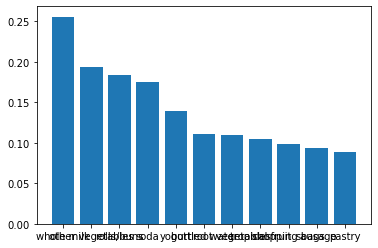

In [205]:
plt.bar(x = dl,height = fia1.support[0:11])
# need to work on making bar graph more wide for name to be seen

<BarContainer object of 11 artists>

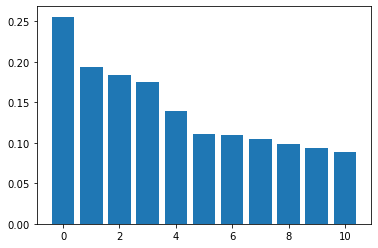

In [206]:
plt.bar(x = list(range(11)),height = fia1.support[0:11]  )

In [207]:
fia1.support[0:11]

0     0.255516
1     0.193493
2     0.183935
3     0.174377
4     0.139502
5     0.110524
6     0.108998
7     0.104931
8     0.098526
9     0.093950
10    0.088968
Name: support, dtype: float64

In [208]:
fia2 = fia1

In [209]:
# adding a new collumn which counts the lensgth of the itemsets
fia2["length"] = fia1["itemsets"].apply(lambda x : len(x))

In [210]:
fia2.head(5)

,support,itemsets,length
0,0.255516,(whole milk),1
1,0.193493,(other vegetables),1
2,0.183935,(rolls/buns),1
3,0.174377,(soda),1
4,0.139502,(yogurt),1


In [211]:
# now lets see for length = 2 and highest support top 5
fia2[fia2["length"] == 2].head(5)

,support,itemsets,length
16,0.074835,"(whole milk, other vegetables)",2
25,0.056634,"(rolls/buns, whole milk)",2
26,0.056024,"(whole milk, yogurt)",2
32,0.048907,"(root vegetables, whole milk)",2
34,0.047382,"(root vegetables, other vegetables)",2


## Finding/Mining Association rule

In [212]:
fia.head(10)

,support,itemsets,length
0,0.255516,(whole milk),1
1,0.193493,(other vegetables),1
2,0.183935,(rolls/buns),1
3,0.174377,(soda),1
4,0.139502,(yogurt),1
5,0.110524,(bottled water),1
6,0.108998,(root vegetables),1
7,0.104931,(tropical fruit),1
8,0.098526,(shopping bags),1
9,0.093950,(sausage),1


## lets find rules with atleast 60% confidence (chance of picking up consequent when antecedent is already in kart)

In [225]:
rules = association_rules(fia , metric = "lift", min_threshold = 1)
rules.shape

(2868, 9)

In [245]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2446,"(rolls/buns, tropical fruit)",(bottled water),0.024606,0.110524,0.005389,0.219008,1.981551,0.002669,1.138906
1824,"(whole milk, yogurt)",(napkins),0.056024,0.052364,0.006101,0.108893,2.079538,0.003167,1.063437
2230,"(citrus fruit, root vegetables)",(tropical fruit),0.017692,0.104931,0.005694,0.321839,3.067139,0.003838,1.319847
956,"(soda, root vegetables)",(other vegetables),0.018607,0.193493,0.008236,0.442623,2.287544,0.004636,1.446969
280,(tropical fruit),(whipped/sour cream),0.104931,0.071683,0.013828,0.131783,1.838419,0.006306,1.069223
...,...,...,...,...,...,...,...,...,...
688,(frankfurter),(tropical fruit),0.058973,0.104931,0.009456,0.160345,1.528092,0.003268,1.065995
1108,"(whole milk, domestic eggs)",(yogurt),0.029995,0.139502,0.007728,0.257627,1.846766,0.003543,1.159119
654,(butter),(domestic eggs),0.055414,0.063447,0.009659,0.174312,2.747368,0.006144,1.134270
718,(shopping bags),(coffee),0.098526,0.058058,0.009354,0.094943,1.635318,0.003634,1.040755


In [246]:
rules1 = rules.sort_values(by = "confidence" , ascending = False , ignore_index = True)

In [247]:
rules1.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(citrus fruit, root vegetables, whole milk)",(other vegetables),0.009151,0.193493,0.005796,0.633333,3.273165,0.004025,2.199566
1,"(pip fruit, root vegetables, whole milk)",(other vegetables),0.008948,0.193493,0.005491,0.613636,3.171368,0.003759,2.087431
2,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
3,"(curd, rolls/buns)",(whole milk),0.010066,0.255516,0.005897,0.585859,2.292845,0.003325,1.797656
4,"(pip fruit, root vegetables)",(whole milk),0.015557,0.255516,0.008948,0.575163,2.250988,0.004973,1.752401
5,"(curd, root vegetables)",(whole milk),0.010880,0.255516,0.006202,0.570093,2.231146,0.003422,1.731734
6,"(brown bread, root vegetables)",(whole milk),0.010168,0.255516,0.005694,0.560000,2.191643,0.003096,1.692009
7,"(citrus fruit, butter)",(whole milk),0.009151,0.255516,0.005084,0.555556,2.174249,0.002746,1.675089
8,"(fruit/vegetable juice, root vegetables)",(other vegetables),0.011998,0.193493,0.006609,0.550847,2.846865,0.004288,1.795620
9,"(pork, rolls/buns)",(whole milk),0.011286,0.255516,0.006202,0.549550,2.150744,0.003319,1.652754


In [248]:
rules1.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction'],
      dtype='object')

### Now we have to find rules with highest confidence and  good lift (greater than 1,1.5) and great overaal support

### High confidence(like0.7) means that when antecednet in cart the good(70%) chance of consequent to get picked off 
### lift much greater than 1confirms that confidence is not deceiving ....i.e. the cofidence did got inflated because the consequent by defuault was too popular choice of buyers
### and overall support value is good high enough to really implement any changes in the product placements


In [249]:
slc = rules1[(rules1.confidence>0.55) & (rules1.lift>1.5)]

In [250]:
slc.sort_values(by = "support", ascending = False , inplace = True )


<ipython-input-250-d3d0813f9e3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slc.sort_values(by = "support", ascending = False , inplace = True )


In [251]:
slc

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
4,"(pip fruit, root vegetables)",(whole milk),0.015557,0.255516,0.008948,0.575163,2.250988,0.004973,1.752401
8,"(fruit/vegetable juice, root vegetables)",(other vegetables),0.011998,0.193493,0.006609,0.550847,2.846865,0.004288,1.795620
5,"(curd, root vegetables)",(whole milk),0.010880,0.255516,0.006202,0.570093,2.231146,0.003422,1.731734
3,"(curd, rolls/buns)",(whole milk),0.010066,0.255516,0.005897,0.585859,2.292845,0.003325,1.797656
0,"(citrus fruit, root vegetables, whole milk)",(other vegetables),0.009151,0.193493,0.005796,0.633333,3.273165,0.004025,2.199566
6,"(brown bread, root vegetables)",(whole milk),0.010168,0.255516,0.005694,0.560000,2.191643,0.003096,1.692009
1,"(pip fruit, root vegetables, whole milk)",(other vegetables),0.008948,0.193493,0.005491,0.613636,3.171368,0.003759,2.087431
7,"(citrus fruit, butter)",(whole milk),0.009151,0.255516,0.005084,0.555556,2.174249,0.002746,1.675089


### Highest support is 1.4% ...so the top change that we may apply covers only 1.4% of transactions
### 1.4 % on large scale may affect things ...so position Some Whole milk close to Root vegetables and Yogurt 

## lets find rules after removing redudent itemsets

In [252]:
def to_list(i):
    return (sorted(list(i)))


ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)


ma_X = ma_X.apply(sorted)

rules_sets = list(ma_X)

unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))


# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]

# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2794,(ham),(white bread),0.026029,0.042095,0.005084,0.195312,4.639851,0.003988,1.190407
2060,"(butter, other vegetables)",(whipped/sour cream),0.020031,0.071683,0.005796,0.289340,4.036397,0.004360,1.306275
1388,(root vegetables),(herbs),0.108998,0.016268,0.007016,0.064366,3.956477,0.005243,1.051406
2152,"(root vegetables, other vegetables)",(onions),0.047382,0.031012,0.005694,0.120172,3.875044,0.004225,1.101338
2286,"(pip fruit, citrus fruit)",(tropical fruit),0.013828,0.104931,0.005592,0.404412,3.854060,0.004141,1.502831
770,(berries),(whipped/sour cream),0.033249,0.071683,0.009049,0.272171,3.796886,0.006666,1.275461
2164,"(root vegetables, whole milk, yogurt)",(tropical fruit),0.014540,0.104931,0.005694,0.391608,3.732043,0.004168,1.471205
1880,(hygiene articles),(napkins),0.032944,0.052364,0.006101,0.185185,3.536498,0.004376,1.163008
2258,"(whole milk, other vegetables, yogurt)",(whipped/sour cream),0.022267,0.071683,0.005592,0.251142,3.503514,0.003996,1.239643
2736,"(fruit/vegetable juice, whole milk, other vege...",(yogurt),0.010473,0.139502,0.005084,0.485437,3.479790,0.003623,1.672289


In [ ]:
rules1 = rules_no_redudancy.sort_values(by = "confidence" , ascending = False , ignore_index = True)

In [254]:
slc = rules1[(rules1.confidence>0.55) & (rules1.lift>1.5)]
slc.sort_values(by = "support", ascending = False , inplace = True )


<ipython-input-254-70f115226298>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slc.sort_values(by = "support", ascending = False , inplace = True )


In [256]:
slc

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
4,"(pip fruit, root vegetables)",(whole milk),0.015557,0.255516,0.008948,0.575163,2.250988,0.004973,1.752401
8,"(fruit/vegetable juice, root vegetables)",(other vegetables),0.011998,0.193493,0.006609,0.550847,2.846865,0.004288,1.795620
5,"(curd, root vegetables)",(whole milk),0.010880,0.255516,0.006202,0.570093,2.231146,0.003422,1.731734
3,"(curd, rolls/buns)",(whole milk),0.010066,0.255516,0.005897,0.585859,2.292845,0.003325,1.797656
0,"(citrus fruit, root vegetables, whole milk)",(other vegetables),0.009151,0.193493,0.005796,0.633333,3.273165,0.004025,2.199566
6,"(brown bread, root vegetables)",(whole milk),0.010168,0.255516,0.005694,0.560000,2.191643,0.003096,1.692009
1,"(pip fruit, root vegetables, whole milk)",(other vegetables),0.008948,0.193493,0.005491,0.613636,3.171368,0.003759,2.087431
7,"(citrus fruit, butter)",(whole milk),0.009151,0.255516,0.005084,0.555556,2.174249,0.002746,1.675089


#### i think deleting repeated itemset is not the play here.....we are finding which antecednets makes buyers to go a consequent so placement of some prtion of product may be placed near the antecedent..saving buyers time and increasing buyers possibility to buy more
#### so in that context i think different orders of antecedents and consequent should be explored